# Encuesta continua de hogares 2020

### Cuánto afecta el nivel eductativo y la cantidad de hijos a las posibilidades de inserción laboral de una mujer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



In [2]:
df = pd.read_spss('HyP_2020_Terceros.sav')

df = df.rename(columns={
    'numero': 'id_hogar',
    'e26': 'sexo',
    'e27': 'edad',
    'e563': 'genero',
    'e29_6': 'ascendencia',
    'e30': 'parentesco',
    'pobpcoac': 'estado_laboral',
    'g126_1': 'sueldo'
    })

df = df[['id_hogar', 'sexo', 'edad', 'genero', 'ascendencia', 'parentesco', 'estado_laboral', 'nper', 'sueldo']]

df['sexo'] = df['sexo'].apply(lambda x:'Masculino' if x == 1 else 'Femenino')
df['nper'] = df['nper'].astype('category')

In [3]:
df.sample(5)

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo
11789,14619,Femenino,56.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,0.0
35481,25009,Femenino,16.0,Mujer,Sin dato,Nieto/a,"Inactivo, pensionista",5.0,0.0
39014,26381,Masculino,18.0,Varón,Blanca,Hijo/a solo del jefe/a,Ocupados,2.0,2500.0
49271,30435,Masculino,57.0,Varón,Blanca,Jefe/a de hogar,Ocupados,1.0,26000.0
99407,50886,Femenino,8.0,0.0,Blanca,Hijo/a de ambos,Menor 14 años,4.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145166 entries, 0 to 145165
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   id_hogar        145166 non-null  object  
 1   sexo            145166 non-null  object  
 2   edad            145166 non-null  float64 
 3   genero          145166 non-null  category
 4   ascendencia     145166 non-null  category
 5   parentesco      145166 non-null  category
 6   estado_laboral  145166 non-null  category
 7   nper            145166 non-null  category
 8   sueldo          145166 non-null  float64 
dtypes: category(5), float64(2), object(2)
memory usage: 5.1+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
edad,145166.0,41.179684,23.657247,0.0,20.0,42.0,60.0,98.0
sueldo,145166.0,9711.315577,20269.848604,0.0,0.0,0.0,15000.0,600000.0


In [6]:
df['estado_laboral'].value_counts() / len(df['estado_laboral']) * 100

Ocupados                                      43.915242
Inactivo, jubilado                            16.902029
Menor 14 años                                 15.480898
Inactivo, estudiante                           8.152735
Inactivo, realiza los quehaceres del hogar     5.433779
Inactivo, pensionista                          3.998870
Desocupados propiamente dichos                 3.600705
Inactivo, otro                                 1.193806
Desocupados BT1V                               0.688867
Inactivo, rentista                             0.340989
Desocupados en seguro de desempleo             0.292079
Name: estado_laboral, dtype: float64

## Género

In [7]:
df['genero'].value_counts()

Mujer                    69037
Varón                    57429
0.0                      18571
Sin dato                    78
Mujer trans                 29
Varón trans                 14
Otra                         6
No sabe / No contesta        2
Name: genero, dtype: int64

## Ascendencia

In [8]:
asc_princ_porcentage = df['ascendencia'].value_counts() / len(df['ascendencia']) * 100

asc_princ_porcentage

Blanca                 69.510767
Asiática o amarilla    23.261645
Afro o negra            3.583484
Sin dato                2.384856
Indígena                1.244782
Otra                    0.014466
Name: ascendencia, dtype: float64

## Composición del hogar

In [9]:
df['parentesco'].value_counts() 

Jefe/a de hogar                            58021
Esposo/a o compañero/a                     31354
Hijo/a de ambos                            27083
Hijo/a solo del jefe/a                     15987
Nieto/a                                     4233
Hijo/a solo del esposo/a compañero/a        2288
Padre/madre                                 1601
Hermano/a                                   1070
Otro pariente                                888
Yerno/nuera                                  875
Otro no pariente                             865
Suegro/a                                     412
Sin dato                                     316
Cuñado/a                                     149
Servicio doméstico o familiar del mismo       24
Name: parentesco, dtype: int64

## Habitantes del hogar

In [10]:
familia = pd.pivot_table(df, index='id_hogar', columns='parentesco',values=['nper'], aggfunc='count')

familia['totales'] = familia.apply(lambda x:x.sum(), axis=1)

familia = familia.sort_values(by='totales', ascending=False)

familia['totales'].value_counts()

2     18429
1     15749
3     11547
4      8634
5      2870
6       887
7       267
8       134
9        44
10       11
12       10
11        8
13        3
16        1
Name: totales, dtype: int64

## Cantidad de habitantes por hogar

In [11]:
df['parentesco_num'] = df['parentesco'].cat.codes

df[['parentesco_num','parentesco']].value_counts()

parentesco_num  parentesco                             
6               Jefe/a de hogar                            58021
1               Esposo/a o compañero/a                     31354
3               Hijo/a de ambos                            27083
5               Hijo/a solo del jefe/a                     15987
7               Nieto/a                                     4233
4               Hijo/a solo del esposo/a compañero/a        2288
10              Padre/madre                                 1601
2               Hermano/a                                   1070
9               Otro pariente                                888
14              Yerno/nuera                                  875
8               Otro no pariente                             865
13              Suegro/a                                     412
12              Sin dato                                     316
0               Cuñado/a                                     149
11              Servicio doméstico

<AxesSubplot:xlabel='sexo'>

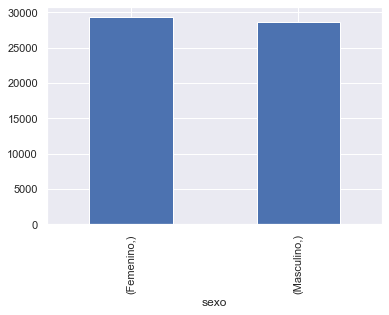

In [12]:
df[['sexo']][df['parentesco'].str.contains('Jefe')].value_counts().plot(kind=('bar'))

## Madres

In [13]:
mask = df['parentesco_num'].isin([3,5,6])
df = df[mask]

df['es_madre'] = np.NaN
df['es_madre'] = df['es_madre'].apply(lambda x:'madre').where(df['parentesco_num'] == 6).where(df['sexo'] == 'Femenino')

## Eliminar filas de hombres jefes de hogar

In [14]:
df_madre_y_familia = df.copy().drop(labels=list(df.loc[(df['sexo'].str.contains('Masculino')) & (df['parentesco_num'] == 6)].index))

df_madre_y_familia


,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo,parentesco_num,es_madre
0,100,Femenino,38.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,86000.0,6,madre
2,100,Masculino,2.0,0.0,Blanca,Hijo/a de ambos,Menor 14 años,3.0,0.0,3,NaN
4,1000,Femenino,26.0,Mujer,Blanca,Hijo/a solo del jefe/a,"Inactivo, pensionista",2.0,0.0,5,NaN
11,10001,Femenino,6.0,0.0,Blanca,Hijo/a de ambos,Menor 14 años,4.0,0.0,3,NaN
12,10006,Femenino,33.0,Mujer,Asiática o amarilla,Jefe/a de hogar,Ocupados,1.0,0.0,6,madre
...,...,...,...,...,...,...,...,...,...,...,...
145157,9989,Femenino,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,22000.0,6,madre
145160,9991,Femenino,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0,6,madre
145161,9992,Femenino,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0,6,madre
145164,9996,Femenino,66.0,Mujer,Blanca,Jefe/a de hogar,"Inactivo, pensionista",1.0,0.0,6,madre


In [15]:
df_madre_y_familia['parentesco'].value_counts()

Jefe/a de hogar                            29325
Hijo/a de ambos                            27083
Hijo/a solo del jefe/a                     15987
Cuñado/a                                       0
Esposo/a o compañero/a                         0
Hermano/a                                      0
Hijo/a solo del esposo/a compañero/a           0
Nieto/a                                        0
Otro no pariente                               0
Otro pariente                                  0
Padre/madre                                    0
Servicio doméstico o familiar del mismo        0
Sin dato                                       0
Suegro/a                                       0
Yerno/nuera                                    0
Name: parentesco, dtype: int64

## Composición de familia solo con jefa de hogar

In [16]:
df_madre_y_familia['hijos'] = df_madre_y_familia.groupby('id_hogar')['id_hogar'].transform('count') - 1

df_madre_y_familia

,id_hogar,sexo,edad,genero,ascendencia,parentesco,estado_laboral,nper,sueldo,parentesco_num,es_madre,hijos
0,100,Femenino,38.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,86000.0,6,madre,1
2,100,Masculino,2.0,0.0,Blanca,Hijo/a de ambos,Menor 14 años,3.0,0.0,3,NaN,1
4,1000,Femenino,26.0,Mujer,Blanca,Hijo/a solo del jefe/a,"Inactivo, pensionista",2.0,0.0,5,NaN,0
11,10001,Femenino,6.0,0.0,Blanca,Hijo/a de ambos,Menor 14 años,4.0,0.0,3,NaN,0
12,10006,Femenino,33.0,Mujer,Asiática o amarilla,Jefe/a de hogar,Ocupados,1.0,0.0,6,madre,1
...,...,...,...,...,...,...,...,...,...,...,...,...
145157,9989,Femenino,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,22000.0,6,madre,0
145160,9991,Femenino,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0,6,madre,0
145161,9992,Femenino,34.0,Mujer,Blanca,Jefe/a de hogar,Ocupados,1.0,30000.0,6,madre,0
145164,9996,Femenino,66.0,Mujer,Blanca,Jefe/a de hogar,"Inactivo, pensionista",1.0,0.0,6,madre,0


## Cantidad de hijos

In [17]:
df_madre_y_familia.where(df['es_madre'].str.contains('madre'))['hijos'].value_counts()

0.0    15065
1.0     8141
2.0     4323
3.0     1308
4.0      344
5.0      100
6.0       39
7.0        5
Name: hijos, dtype: int64